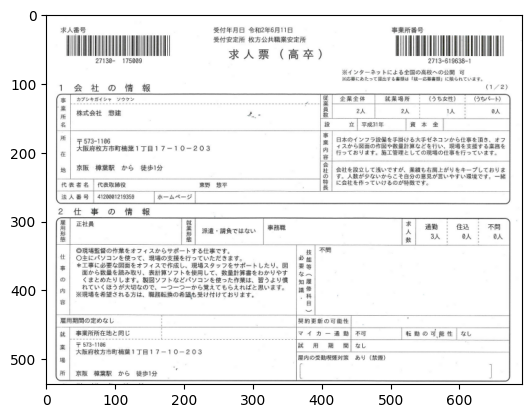

In [1]:
import os
import matplotlib.pyplot as plt
import cv2

root_path = os.getcwd()
# /Users/linlinhlaing/Downloads/download/AI/github codes/image-processing-practice/OCR_project/image.png
input_img = cv2.imread(root_path+r'/image.png')
plt.imshow(input_img)

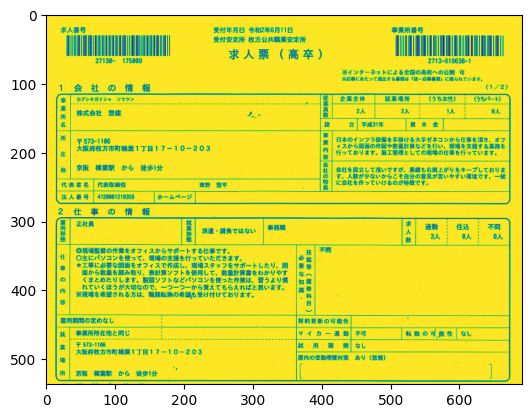

In [2]:
img = input_img.copy()
grey_img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
plt.imshow(grey_img)

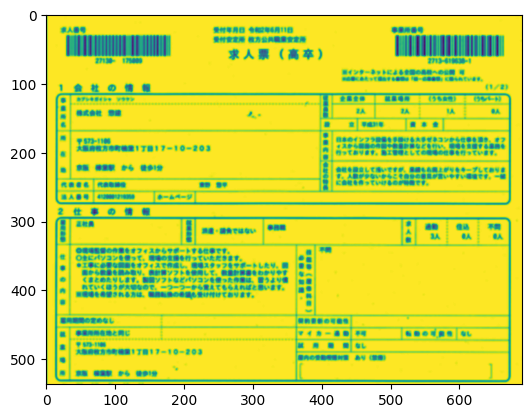

In [3]:
blurred = cv2.GaussianBlur(grey_img,(5,5),0)
plt.imshow(blurred)

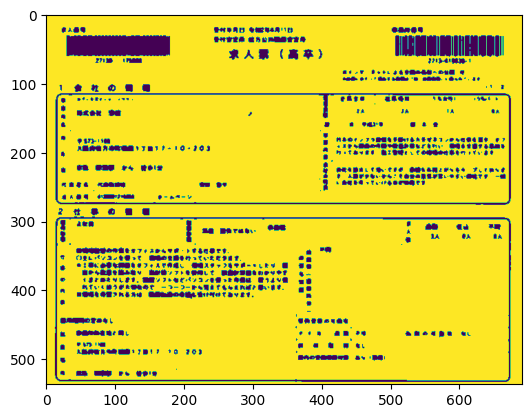

In [4]:
threshold_image = cv2.threshold(blurred,200,225,cv2.THRESH_BINARY)[1]
plt.imshow(threshold_image)

In [5]:
#Perform Bilateral Filter
gray = cv2.bilateralFilter(threshold_image,1,100,150)

In [6]:
filter_img = cv2.bilateralFilter(gray,1,100,150)

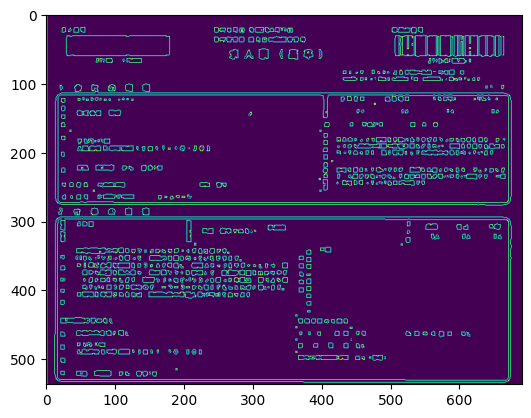

In [7]:
canny_edges = cv2.Canny(filter_img,20,200)
plt.imshow(canny_edges)

In [8]:
contours , hierachy = cv2.findContours(canny_edges,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)

In [9]:
rect_list = []
for i in contours:
    i_area = cv2.contourArea(i)
    if i_area > 4600:
        # print(i_area)
        peri = cv2.arcLength(i,True)
        approx = cv2.approxPolyDP(i, 0.02 * peri , True)
        rect_list.append(approx)
        print(approx)
        cv2.drawContours(img,[approx],-1,(0,255,0),3)
        print("############")
        


[[[ 14 299]]

 [[ 18 532]]

 [[673 529]]

 [[668 295]]]
############
[[[ 14 299]]

 [[668 295]]

 [[673 529]]

 [[ 18 532]]]
############
[[[ 17 120]]

 [[ 20 273]]

 [[671 271]]

 [[669 118]]]
############
[[[ 17 120]]

 [[669 118]]

 [[671 270]]

 [[ 20 273]]]
############


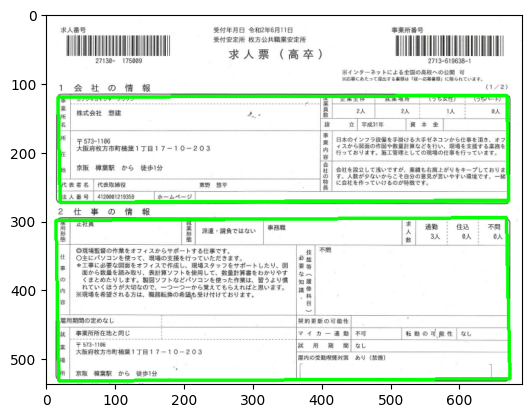

In [10]:
plt.imshow(img)

In [11]:
rect_list

[array([[[ 14, 299]],
 
        [[ 18, 532]],
 
        [[673, 529]],
 
        [[668, 295]]], dtype=int32),
 array([[[ 14, 299]],
 
        [[668, 295]],
 
        [[673, 529]],
 
        [[ 18, 532]]], dtype=int32),
 array([[[ 17, 120]],
 
        [[ 20, 273]],
 
        [[671, 271]],
 
        [[669, 118]]], dtype=int32),
 array([[[ 17, 120]],
 
        [[669, 118]],
 
        [[671, 270]],
 
        [[ 20, 273]]], dtype=int32)]

In [12]:
i = 2
xindexs = [rect_list[i][0][0][0], rect_list[i][1][0][0], rect_list[i][2][0][0],
                rect_list[i][3][0][0]]

yindexs = [rect_list[i][0][0][1], rect_list[i][1][0][1], rect_list[i][2][0][1],
                rect_list[i][3][0][1]]

In [13]:
print(xindexs)
print(yindexs)

[17, 20, 671, 669]
[120, 273, 271, 118]


In [14]:
import numpy as np
x1 = np.min(xindexs)
x2 = np.max(xindexs)

y1 = np.min(yindexs)
y2 = np.max(yindexs)
print(x1,x2,y1,y2)

17 671 118 273


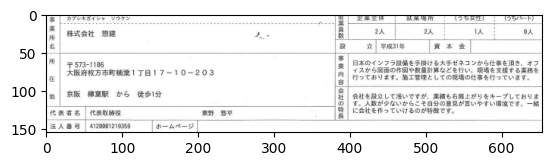

In [15]:
tocropped = input_img.copy()
cropped_img = tocropped[y1:y2,x1:x2,:]
cv2.imwrite("result_image.png",cropped_img)
plt.imshow(cropped_img)

In [16]:
# !pip install python-dotenv

In [17]:

from dotenv import load_dotenv
import os
load_dotenv()
env_var = os.getenv('GOOGLE_APPLICATION_CREDENTIALS')
print(env_var)



/Users/linlinhlaing/Downloads/download/AI/github codes/image-processing-practice/credentials/service_account/pivotal-triode-435919-h4-bcf80f3c4640.json


In [18]:
# !pip install google-cloud-vision


In [25]:
from google.cloud import vision
import io

image_file = io.open('result_image.png','rb')
content = image_file.read()
client = vision.ImageAnnotatorClient()
image = vision.Image(content = content)

In [26]:
response = client.text_detection(image)
response

text_annotations {
  locale: "ja"
  description: "事\nカブシキガイシャ ソウケン\n*業\n株式会社 建\n所\n名\n所\n〒573-1106\n大阪府枚方市町楠葉1丁目17-10-203\n在\n地\n京阪樟葉駅 から 徒歩1分\n代表者名 代表取締役\n東野 平\n法人番号\n4120001219359\nホームページ\n企業全体\n就菜場所\n(うち女性)\n(うちパート)\n2人\n2人\n0人\n設\n立平成31年\n資本金\n従業員数 事業内容 会社の特長\n日本のインフラ設備を手掛ける大手ゼネコンから仕事を頂き、 オフ\nィスから図面の作図や数量計算などを行い、 現場を支援する業務を\n行っております。 施工管理としての現場の仕事を行っています。\n会社を設立して浅いですが、業績も右肩上がりをキープしておりま\nす。 人数が少ないからこそ自分の意見が言いやすい環境です。 一緒\nに会社を作っていけるのが特徴です。"
  bounding_poly {
    vertices {
    }
    vertices {
      x: 650
    }
    vertices {
      x: 650
      y: 151
    }
    vertices {
      y: 151
    }
  }
}
text_annotations {
  description: "事"
  bounding_poly {
    vertices {
      x: 3
      y: 3
    }
    vertices {
      x: 13
      y: 3
    }
    vertices {
      x: 13
      y: 10
    }
    vertices {
      x: 3
      y: 10
    }
  }
}
text_annotations {
  description: "カブシキガイシャ"
  bounding_poly {
    vertices {
      x: 27
      y: 3
    }
    vertices {
      x: 78
      y: 3
    }
   

In [27]:
import json
def load_template_frame(jsonTemplate_path):


    block_shapes = None
    template_infos = []

    with open(jsonTemplate_path, 'r') as json_file:
        data = json.load(json_file)
        block_shapes = data['shapes']

    for cur_bk in (block_shapes):
        label = cur_bk['label']
        points = cur_bk['points']
        x, y, x2, y2 = int(points[0][0]), int(points[0][1]), int(points[1][0]), int(points[1][1])

        template_infos.append([label, x, y, x2, y2])
    return template_infos



jsonTemplate_path = os.getcwd()+"/templates/block_1.json"
template_infos = load_template_frame(jsonTemplate_path)
print(template_infos)

[['1b_01', 1, 0, 47, 110], ['1b_02', 47, 0, 874, 31], ['1b_03', 48, 30, 872, 110], ['1b_04', 874, 2, 912, 76], ['1b_05', 910, 1, 1053, 31], ['1b_06', 911, 30, 1054, 75], ['1b_07', 1055, 1, 1201, 31], ['1b_08', 1054, 32, 1201, 75], ['1b_09', 1203, 1, 1349, 32], ['1b_10', 1203, 32, 1348, 77], ['1b_11', 1349, 0, 1498, 31], ['1b_12', 1498, 77, 1349, 30], ['1b_13', 874, 75, 995, 114], ['1b_14', 998, 75, 1158, 111], ['1b_15', 1158, 75, 1279, 112], ['1b_16', 1280, 76, 1498, 114], ['1b_17', 0, 109, 46, 259], ['1b_18', 47, 110, 873, 262], ['1b_19', 912, 207, 874, 113], ['1b_20', 914, 113, 1498, 208], ['1b_21', 873, 208, 911, 299], ['1b_22', 912, 207, 1498, 301], ['1b_23', 1, 259, 122, 297], ['1b_24', 124, 261, 872, 300], ['1b_25', 1, 297, 123, 334], ['1b_26', 123, 297, 323, 335], ['1b_27', 324, 299, 459, 335], ['1b_28', 460, 299, 1499, 335]]


In [29]:
def match_Template():
    result_dict = {}
    for bbox in template_infos:
        label_name,x1,y1,x2,y2 = bbox[0],bbox[1],bbox[2],bbox[3],bbox[4]
        print(label_name)
match_Template()        

1b_01
1b_02
1b_03
1b_04
1b_05
1b_06
1b_07
1b_08
1b_09
1b_10
1b_11
1b_12
1b_13
1b_14
1b_15
1b_16
1b_17
1b_18
1b_19
1b_20
1b_21
1b_22
1b_23
1b_24
1b_25
1b_26
1b_27
1b_28


In [31]:
def load_xmlResponsesText(response):
        responseText_infos = []
        document = response.full_text_annotation
        for page in document.pages:
            for block in page.blocks:
                for paragraph in block.paragraphs:
                    for word in paragraph.words:
                        for symbol in word.symbols:
                            bbox = symbol.bounding_box
                            xmin = bbox.vertices[0].x
                            ymin = bbox.vertices[0].y
                            xmax = bbox.vertices[2].x
                            ymax = bbox.vertices[2].y
                            xcenter = (xmin + xmax) / 2
                            ycenter = (ymin + ymax) / 2

                            text = symbol.text
                            responseText_infos.append([text, xcenter, ycenter])
        return responseText_infos

In [32]:
responseText_infos = load_xmlResponsesText(response)
responseText_infos

[['事', 8.0, 6.5],
 ['カ', 29.5, 5.5],
 ['ブ', 36.5, 5.5],
 ['シ', 43.0, 5.5],
 ['キ', 48.5, 5.5],
 ['ガ', 55.5, 5.5],
 ['イ', 61.5, 5.5],
 ['シ', 69.0, 5.5],
 ['ャ', 75.5, 5.5],
 ['ソ', 88.0, 5.5],
 ['ウ', 94.5, 5.5],
 ['ケ', 102.0, 5.5],
 ['ン', 108.0, 5.5],
 ['*', 1.0, 19.0],
 ['業', 6.0, 18.0],
 ['株', 30.5, 25.5],
 ['式', 40.5, 25.5],
 ['会', 49.5, 25.5],
 ['社', 60.0, 25.5],
 ['建', 87.0, 25.5],
 ['所', 8.0, 30.5],
 ['名', 7.5, 42.0],
 ['所', 8.0, 62.0],
 ['〒', 31.0, 67.0],
 ['5', 39.0, 66.0],
 ['7', 43.5, 66.0],
 ['3', 48.0, 66.0],
 ['-', 53.0, 66.0],
 ['1', 58.0, 66.0],
 ['1', 63.0, 66.0],
 ['0', 68.0, 66.0],
 ['6', 72.0, 66.0],
 ['大', 31.5, 77.5],
 ['阪', 39.0, 76.5],
 ['府', 48.5, 76.5],
 ['枚', 58.0, 76.5],
 ['方', 67.0, 76.5],
 ['市', 77.0, 76.5],
 ['町', 86.5, 76.5],
 ['楠', 95.0, 76.5],
 ['葉', 104.0, 76.5],
 ['1', 113.0, 76.5],
 ['丁', 123.5, 76.5],
 ['目', 133.0, 76.5],
 ['1', 142.0, 76.5],
 ['7', 151.5, 76.5],
 ['-', 160.5, 76.5],
 ['1', 169.5, 76.5],
 ['0', 179.5, 76.5],
 ['-', 188.5, 75.5],
 ['2', 

In [33]:
def match_Template(template_infos,responseText_infos):
    result_dict = {}
    for bbox in template_infos:
        label, xmin, ymin, xmax, ymax = bbox[0], bbox[1], bbox[2], bbox[3], bbox[4]
        texts = ''
        for text_info in responseText_infos:
            text = text_info[0]
            xcenter = text_info[1]
            ycenter = text_info[2]
            if xmin <= xcenter <= xmax and ymin <= ycenter <= ymax:
                texts += text
            result_dict[label] = str(texts)

    
    return  result_dict
result_dict = match_Template(template_infos,responseText_infos)
(result_dict)

{'1b_01': '事カブシ*業株式所名所〒57大阪在地京阪',
 '1b_02': 'キガイシャソウケン会社建企業全体就菜場所(うち女性)(うちパート)2人2人0人従業員数',
 '1b_03': '3-1106府枚方市町楠葉1丁目17-10-203樟葉駅から徒歩1分設立平成31年資本金事業内容会社日本のインフラ設備を手掛ける大手ゼネコンから仕事を頂き、オフィスから図面の作図や数量計算などを行い、現場を支援する業務を行っております。施工管理としての現場の仕事を行っています。会社を設立して浅いですが、業績も右肩上がりをキープしておりま',
 '1b_04': '',
 '1b_05': '',
 '1b_06': '',
 '1b_07': '',
 '1b_08': '',
 '1b_09': '',
 '1b_10': '',
 '1b_11': '',
 '1b_12': '',
 '1b_13': '',
 '1b_14': '',
 '1b_15': '',
 '1b_16': '',
 '1b_17': '代表者名法人番号',
 '1b_18': '代表取締役東野平4120001219359ホームページの特長す。人数が少ないからこそ自分の意見が言いやすい環境です。一緒に会社を作っていけるのが特徴です。',
 '1b_19': '',
 '1b_20': '',
 '1b_21': '',
 '1b_22': '',
 '1b_23': '',
 '1b_24': '',
 '1b_25': '',
 '1b_26': '',
 '1b_27': '',
 '1b_28': ''}